# 1-1. 最尤推定を理解する

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

np.random.seed(1)

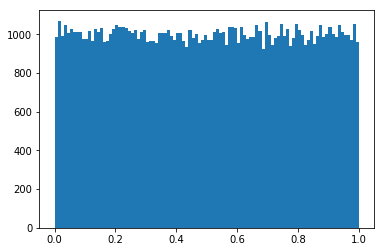

In [2]:
# np.random.random()は[0-1]の一様分布
plt.hist(np.random.random(10**5), bins=100); plt.show(); plt.close()

In [3]:
# 表が出やすいコイン
p_true = 0.8 # 表が出る確率
N = 10**2 # 観測したデータ数

# 表なら1, 裏なら0を記録する
data = np.random.random(N)
data = (data < p_true).astype(int)
display(data)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [4]:
liklihood = np.power(p_true, np.sum(data==1)) \
                * np.power((1-p_true), np.sum(data==0))
display(liklihood)

2.8948022309329027e-24

In [5]:
logliklihood = np.log(p_true) * np.sum(data==1) \
                    + np.log(1-p_true) * np.sum(data==0)
display(logliklihood)

-54.19912543717845

In [6]:
def get_logliklihood_coin(data, p):
    """
    Args:
        data[np.array]: コインが表なら1, 裏なら0のデータ
        p[float]: コインの表が出る確率
    Return:
        logliklihood[float]: データの対数尤度
    """
    logliklihood = np.log(p) * np.sum(data==1) \
                    + np.log(1-p) * np.sum(data==0)
    return logliklihood

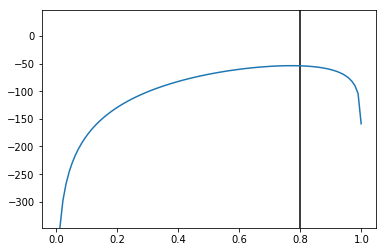

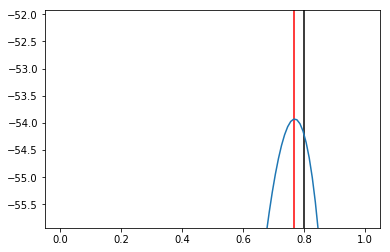

-53.92992791716482

0.7671414141414141

In [7]:
LL_list = []
epsilon = 10**(-3)
i_hat = 0
p_space = np.linspace(epsilon,1-epsilon,100)

for i in range(p_space.shape[0]):
    LL = get_logliklihood_coin(data, p_space[i])
    LL_list.append(LL)
    if LL_list[i] > LL_list[i_hat]:
        i_hat = i

ymin, ymax = min(LL_list[1], LL_list[-1]),LL_list[i_hat]+100
plt.plot(p_space, LL_list)
plt.vlines(x = p_true, ymin=ymin, ymax=ymax)
plt.ylim(ymin, ymax)
plt.show(); plt.close()

plt.plot(p_space, LL_list)
plt.vlines(x = p_true, ymin=ymin, ymax=ymax, color="black")
plt.vlines(x = p_space[i_hat], ymin=ymin, ymax=ymax, color="r")
plt.ylim(LL_list[i_hat]-2,LL_list[i_hat]+2)
plt.show(); plt.close()

display(LL_list[i_hat], p_space[i_hat])

In [8]:
i_hat, LL_list[i_hat]

(76, -53.92992791716482)

In [9]:
LL_list[i_hat], p_space[i_hat]

(-53.92992791716482, 0.7671414141414141)